# Monitoring Analyst Test

In this analysis, we will examine checkout data from a point-of-sale (POS) system to identify any anomalous behavior. The dataset includes hourly sales data for today, yesterday, and the average sales for the same hours on previous days. By comparing these metrics, we can gain insights into unusual sales patterns and potential issues.


## Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis

Let's start by understanding the data.

In [4]:
# Importing the data
checkout_1 = pd.read_csv("checkout_1.csv")
checkout_2 = pd.read_csv("checkout_2.csv")

# Concating the two csv files into one dataframe
checkout_concated = pd.concat([checkout_1, checkout_2]).sort_values(by='time')

checkout_concated.info()
checkout_concated.head()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                48 non-null     object 
 1   today               48 non-null     int64  
 2   yesterday           48 non-null     int64  
 3   same_day_last_week  48 non-null     int64  
 4   avg_last_week       48 non-null     float64
 5   avg_last_month      48 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.6+ KB


,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
0,00h,9,12,11,6.42,4.85
0,00h,6,9,5,5.00,4.92
1,01h,3,3,2,2.00,1.92
1,01h,3,5,1,1.85,1.92
2,02h,1,0,0,0.28,0.82


Here we can see the dTypes and see that the data does not have any NULL value.

An important observation is that we don't have the startand deviation, or better, we don't have the data hour to hour for an entirely week or month, so in a real case it could be interesting asking for more data instead only using the avarage of the data. It could prevent any bias on our analysis.

### Checkout 1 Data

Let´s start by creating a visualization of the first dataset.

Here we have a visualization of the data, comparing the number of sales for hours, each bar graph is grouped by a column of the days or the avarages.

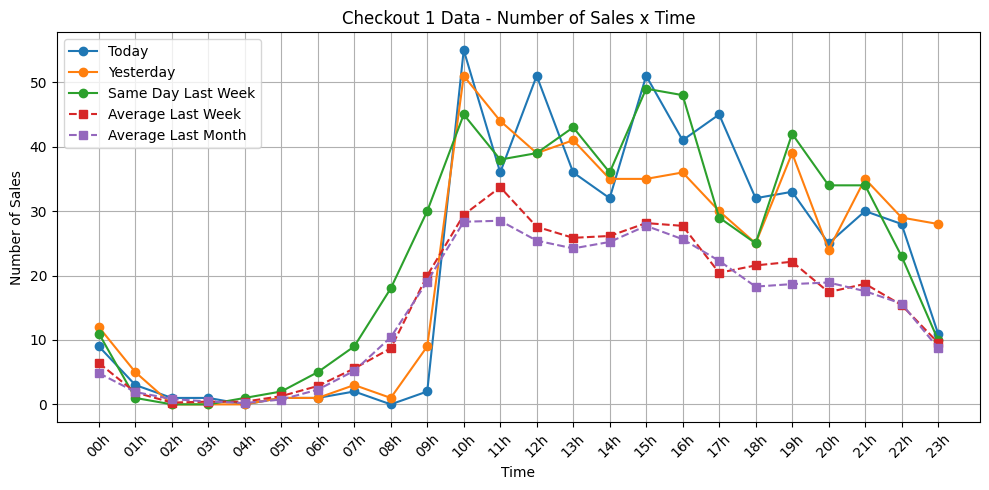

In [6]:
# Ploting a line graph
plt.figure(figsize=(10, 5))

# Ploting each line
plt.plot(checkout_1['time'], checkout_1['today'], marker='o', label='Today')
plt.plot(checkout_1['time'], checkout_1['yesterday'], marker='o', label='Yesterday')
plt.plot(checkout_1['time'], checkout_1['same_day_last_week'], marker='o', label='Same Day Last Week')
plt.plot(checkout_1['time'], checkout_1['avg_last_week'], marker='s', linestyle='--',label='Average Last Week')
plt.plot(checkout_1['time'], checkout_1['avg_last_month'], marker='s', linestyle='--', label='Average Last Month')

# Improving visualization
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Number of Sales')
plt.title('Checkout 1 Data - Number of Sales x Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Showing the graph
plt.show()

#### Analysing the data

Here's we will analyse if the 3 columns ('today', 'yesterday', 'same_day_last_week') have any possible anomalous value.

| Time | Column | Observation |
|------|--------|-------------|
| 08h  | Today and Yesterday | Sales are too lower compared to all avaliable data. |
| 09h  | Today | Sales are too lower compared to all avaliable data. |
| 10h  | Today and Yesterday  | Uncommon spike in sales, compared to the avarages. |
| 12h & 15h  | Today  | Uncommon spike in sales, compared to the avarages. |
| 15h  | Same_day_last_week | Uncommon spike in sales, compared to the avarages. |
| 16h  | Same_day_last_week | Higher sales compared to historical averages. |
| 17h  | Today  | Uncommon spike in sales, compared to all avaliable data. |
| 19h  | Same_day_last_week | Uncommon spike in sales, compared to the avarages. |
| 19h  | Yesterday | Uncommon spike in sales, compared to the avarages. |
| 23h  | Yesterday | Sales continues estable were all other data goes down. |

The point here, is that the avaliable data is not enought for a significant data analisys. But some possible anomalous values call us attencion, like:
1. The Today and Yesterday columns, during de 08h time;
2. The spikes in all 3 columns;
3. The Yesterday column, during the 23h time.


### Checkout 2 Data

Continuing the proccess to the second dataset.

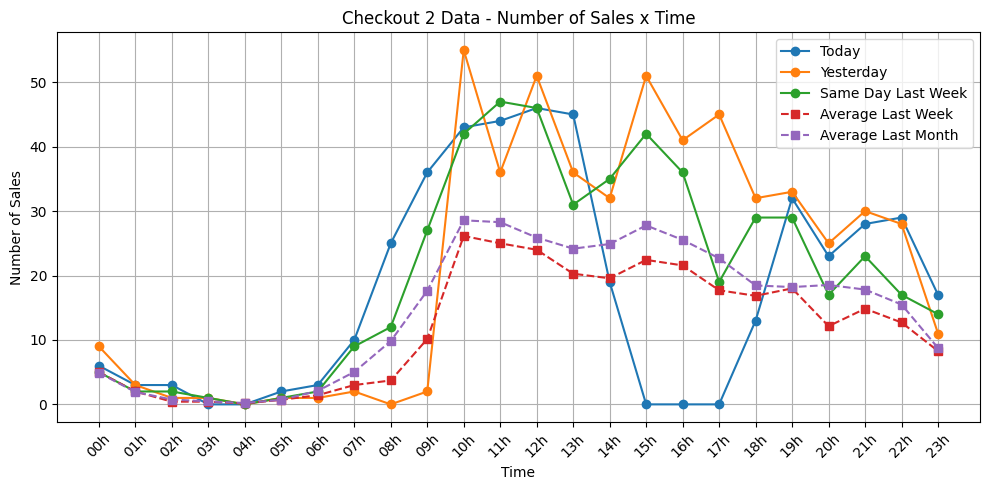

In [8]:
# Ploting a line graph
plt.figure(figsize=(10, 5))

# Ploting each line
plt.plot(checkout_2['time'], checkout_2['today'], marker='o', label='Today')
plt.plot(checkout_2['time'], checkout_2['yesterday'], marker='o', label='Yesterday')
plt.plot(checkout_2['time'], checkout_2['same_day_last_week'], marker='o', label='Same Day Last Week')
plt.plot(checkout_2['time'], checkout_2['avg_last_week'], marker='s', linestyle='--',label='Average Last Week')
plt.plot(checkout_2['time'], checkout_2['avg_last_month'], marker='s', linestyle='--', label='Average Last Month')


# Improving visualization
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Number of Sales')
plt.title('Checkout 2 Data - Number of Sales x Time')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Showing the graph
plt.show()

#### Analysing the data

Here's we will analyse if the 3 columns ('today', 'yesterday', 'same_day_last_week') have any possible anomalous value.


| Time | Column | Observation |
|------|--------|-------------|
| 8h  | Yesterday | Sales are zero. |
| 9h  | Yesterday | Uncommon spike in sales, compared to the avarages. |
| 10h  | Yesterday | Uncommon spike in sales, compared to the avarages. |
| 15h  | Yesterday | Uncommon spike in sales, compared to the avarages. |
| 15h & 16h & 17h  | Today | Sales are zero. |

Today's sales between 15h and 17h seem to show us a failure in transactions.

## Conclusion

Problem: The dataset given is too small to perform a robust analysis. Limited data points can lead to unreliable conclusions and missed anomalies. <br>
Solution: Communicate the issue to the team and stakeholders. Request more extensive data to conduct a thorough and accurate analysis.
